In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sar-image-colorization/QXSLAB_SAROPT/sar_256_oc_0.2/9273.png
/kaggle/input/sar-image-colorization/QXSLAB_SAROPT/sar_256_oc_0.2/18966.png
/kaggle/input/sar-image-colorization/QXSLAB_SAROPT/sar_256_oc_0.2/14127.png
/kaggle/input/sar-image-colorization/QXSLAB_SAROPT/sar_256_oc_0.2/18054.png
/kaggle/input/sar-image-colorization/QXSLAB_SAROPT/sar_256_oc_0.2/9292.png
/kaggle/input/sar-image-colorization/QXSLAB_SAROPT/sar_256_oc_0.2/11396.png
/kaggle/input/sar-image-colorization/QXSLAB_SAROPT/sar_256_oc_0.2/14260.png
/kaggle/input/sar-image-colorization/QXSLAB_SAROPT/sar_256_oc_0.2/4353.png
/kaggle/input/sar-image-colorization/QXSLAB_SAROPT/sar_256_oc_0.2/7968.png
/kaggle/input/sar-image-colorization/QXSLAB_SAROPT/sar_256_oc_0.2/15834.png
/kaggle/input/sar-image-colorization/QXSLAB_SAROPT/sar_256_oc_0.2/6490.png
/kaggle/input/sar-image-colorization/QXSLAB_SAROPT/sar_256_oc_0.2/5511.png
/kaggle/input/sar-image-colorization/QXSLAB_SAROPT/sar_256_oc_0.2/6262.png
/kaggle/input/sar-i

In [2]:
pip install tensorflow keras opencv-python numpy matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
import os

# Check the available directories under /kaggle/input/
base_path = "/kaggle/input/"
for dirname, _, filenames in os.walk(base_path):
    print(dirname)  # Print all directories


/kaggle/input/
/kaggle/input/sar-image-colorization
/kaggle/input/sar-image-colorization/QXSLAB_SAROPT
/kaggle/input/sar-image-colorization/QXSLAB_SAROPT/sar_256_oc_0.2
/kaggle/input/sar-image-colorization/QXSLAB_SAROPT/opt_256_oc_0.2


In [4]:
sar_path = "/kaggle/input/sar-image-colorization/QXSLAB_SAROPT/sar_256_oc_0.2"
opt_path = "/kaggle/input/sar-image-colorization/QXSLAB_SAROPT/opt_256_oc_0.2"


In [5]:
import os
print(os.listdir("/kaggle/input/sar-image-colorization/QXSLAB_SAROPT"))


['sar_256_oc_0.2', 'opt_256_oc_0.2']


In [6]:
print(os.listdir(sar_path)[:5])  # Print first 5 SAR images
print(os.listdir(opt_path)[:5])  # Print first 5 Optical images


['9273.png', '18966.png', '14127.png', '18054.png', '9292.png']
['9273.png', '18966.png', '14127.png', '18054.png', '9292.png']


In [7]:
import os

# Define paths
sar_path = "/kaggle/input/sar-image-colorization/QXSLAB_SAROPT/sar_256_oc_0.2"
opt_path = "/kaggle/input/sar-image-colorization/QXSLAB_SAROPT/opt_256_oc_0.2"

# List the first 5 files in each directory
print("SAR Images:", os.listdir(sar_path)[:5])
print("Optical Images:", os.listdir(opt_path)[:5])


SAR Images: ['9273.png', '18966.png', '14127.png', '18054.png', '9292.png']
Optical Images: ['9273.png', '18966.png', '14127.png', '18054.png', '9292.png']


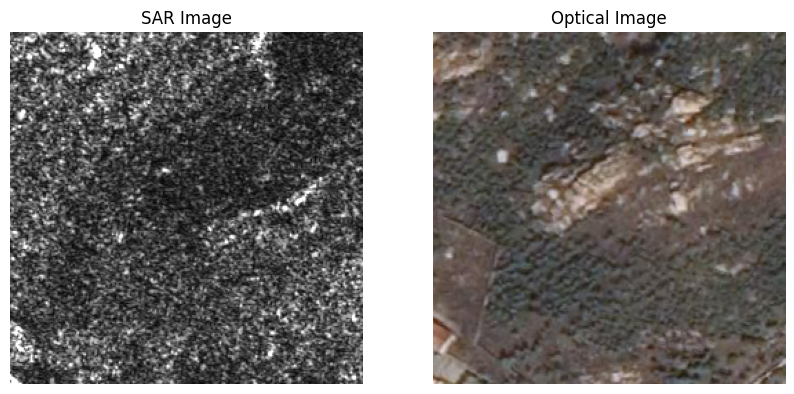

In [8]:
import cv2
import matplotlib.pyplot as plt

# Select a sample image index (change as needed)
sample_idx = 0

# Get filenames
sar_filename = sorted(os.listdir(sar_path))[sample_idx]
opt_filename = sorted(os.listdir(opt_path))[sample_idx]

# Construct full paths
sar_img_path = os.path.join(sar_path, sar_filename)
opt_img_path = os.path.join(opt_path, opt_filename)

# Load SAR image (grayscale)
sar_img = cv2.imread(sar_img_path, cv2.IMREAD_GRAYSCALE)

# Load Optical image (convert BGR to RGB)
opt_img = cv2.imread(opt_img_path)
opt_img = cv2.cvtColor(opt_img, cv2.COLOR_BGR2RGB)

# Plot images side by side
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(sar_img, cmap='gray')
plt.title("SAR Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(opt_img)
plt.title("Optical Image")
plt.axis("off")

plt.show()


In [9]:
import os
import cv2
import numpy as np

def load_images_from_folder(folder_path, img_size=(256, 256), is_gray=False):
    images = []
    for filename in sorted(os.listdir(folder_path)):  # Sorting to maintain order
        img_path = os.path.join(folder_path, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE if is_gray else cv2.IMREAD_COLOR)
        img = cv2.resize(img, img_size)  # Resize to match model input size
        if not is_gray:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        images.append(img)
    return np.array(images, dtype=np.float32)  # Convert to NumPy array

# Define dataset paths
sar_path = "/kaggle/input/sar-image-colorization/QXSLAB_SAROPT/sar_256_oc_0.2"
opt_path = "/kaggle/input/sar-image-colorization/QXSLAB_SAROPT/opt_256_oc_0.2"

# Load images
sar_images = load_images_from_folder(sar_path, is_gray=True)
opt_images = load_images_from_folder(opt_path, is_gray=False)


In [10]:
sar_images = sar_images / 255.0
opt_images = opt_images / 255.0


In [ ]:
import tensorflow as tf
import cv2
import os
import numpy as np

# Define dataset paths
sar_path = "/kaggle/input/sar-image-colorization/QXSLAB_SAROPT/sar_256_oc_0.2"
opt_path = "/kaggle/input/sar-image-colorization/QXSLAB_SAROPT/opt_256_oc_0.2"

IMG_SIZE = (256, 256)
BATCH_SIZE = 8

# Function to load and preprocess images
def preprocess_image(img_path, is_gray=False):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE if is_gray else cv2.IMREAD_COLOR)
    img = cv2.resize(img, IMG_SIZE)
    if not is_gray:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img = img / 255.0  # Normalize
    img = np.expand_dims(img, axis=-1) if is_gray else img  # Add channel if grayscale
    return img.astype(np.float32)

# Generator function for TensorFlow Dataset
def data_generator():
    sar_files = sorted(os.listdir(sar_path))
    opt_files = sorted(os.listdir(opt_path))
    
    for sar_file, opt_file in zip(sar_files, opt_files):
        sar_img = preprocess_image(os.path.join(sar_path, sar_file), is_gray=True)
        opt_img = preprocess_image(os.path.join(opt_path, opt_file), is_gray=False)
        yield sar_img, opt_img

# Create TensorFlow Dataset
dataset = tf.data.Dataset.from_generator(
    data_generator,
    output_signature=(
        tf.TensorSpec(shape=(256, 256, 1), dtype=tf.float32),  # SAR Image
        tf.TensorSpec(shape=(256, 256, 3), dtype=tf.float32)   # Optical Image
    )
).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)


In [ ]:

BATCH_SIZE = 4  # Reduce batch size to avoid memory overflow


In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanAbsoluteError
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras import layers
import tensorflow as tf

class SelfAttention(layers.Layer):
    def __init__(self, channels):
        super(SelfAttention, self).__init__()
        self.channels = channels
        self.conv_f = layers.Conv2D(channels // 8, kernel_size=1, padding='same')
        self.conv_g = layers.Conv2D(channels // 8, kernel_size=1, padding='same')
        self.conv_h = layers.Conv2D(channels, kernel_size=1, padding='same')
        self.gamma = self.add_weight(shape=(1,), initializer='zeros', trainable=True)

    def call(self, inputs):
        batch_size = tf.shape(inputs)[0]
        height = tf.shape(inputs)[1]
        width = tf.shape(inputs)[2]
        channels = self.channels

        # Apply 1x1 convolutions to get f, g, h
        f = self.conv_f(inputs)  # Shape: (batch_size, height, width, channels // 8)
        g = self.conv_g(inputs)  # Shape: (batch_size, height, width, channels // 8)
        h = self.conv_h(inputs)  # Shape: (batch_size, height, width, channels)

        # Reshape f, g, h to (batch_size, height * width, channels // 8 or channels)
        f = tf.reshape(f, (batch_size, height * width, -1))  # Shape: (batch_size, height * width, channels // 8)
        g = tf.reshape(g, (batch_size, height * width, -1))  # Shape: (batch_size, height * width, channels // 8)
        h = tf.reshape(h, (batch_size, height * width, -1))  # Shape: (batch_size, height * width, channels)

        # Compute attention scores
        attention_scores = tf.matmul(f, g, transpose_b=True)  # Shape: (batch_size, height * width, height * width)
        attention_scores = tf.nn.softmax(attention_scores, axis=-1)

        # Apply attention to h
        out = tf.matmul(attention_scores, h)  # Shape: (batch_size, height * width, channels)
        out = tf.reshape(out, (batch_size, height, width, channels))  # Shape: (batch_size, height, width, channels)

        # Apply gamma and add to input
        out = self.gamma * out + inputs
        return out

    def get_config(self):
        config = super(SelfAttention, self).get_config()
        config.update({"channels": self.channels})
        return config

In [ ]:
def build_autoencoder(input_shape):
    inputs = layers.Input(shape=input_shape)
    
    # Encoder
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    
    # Self-Attention Block
    x = SelfAttention(channels=256)(x)
    
    # Decoder
    x = layers.Conv2DTranspose(128, (3, 3), strides=2, activation='relu', padding='same')(x)
    x = layers.Conv2DTranspose(64, (3, 3), strides=2, activation='relu', padding='same')(x)
    outputs = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)
    
    model = models.Model(inputs, outputs)
    return model

In [ ]:
def perceptual_loss(y_true, y_pred):
    vgg = VGG16(include_top=False, weights='imagenet', input_shape=(256, 256, 3))
    vgg.trainable = False
    loss_model = models.Model(inputs=vgg.input, outputs=vgg.get_layer('block3_conv3').output)
    loss_model.trainable = False

    y_true = preprocess_input(y_true * 255.0)
    y_pred = preprocess_input(y_pred * 255.0)

    true_features = loss_model(y_true)
    pred_features = loss_model(y_pred)

    return tf.reduce_mean(tf.square(true_features - pred_features))

In [ ]:
input_shape = (256, 256, 1)
autoencoder = build_autoencoder(input_shape)
autoencoder.compile(optimizer=Adam(learning_rate=1e-4), loss=perceptual_loss)

# Assuming you have your data loaded as sar_images and opt_images
# sar_images: Grayscale SAR images
# opt_images: Corresponding RGB optical images

# Normalize images
sar_images = sar_images / 255.0
opt_images = opt_images / 255.0

# Train the model
autoencoder.fit(sar_images, opt_images, batch_size=8, epochs=50, validation_split=0.1)

In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanAbsoluteError
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
import matplotlib.pyplot as plt


In [ ]:
# Define dataset paths
sar_path = "/kaggle/input/sar-image-colorization/QXSLAB_SAROPT/sar_256_oc_0.2"
opt_path = "/kaggle/input/sar-image-colorization/QXSLAB_SAROPT/opt_256_oc_0.2"

# Check if the files exist
print("SAR Files:", os.listdir(sar_path)[:5])  # Print first 5 SAR images
print("Optical Files:", os.listdir(opt_path)[:5])  # Print first 5 Optical images


In [ ]:
IMG_SIZE = (256, 256)
BATCH_SIZE = 8

# Function to load and preprocess images
def preprocess_image(img_path, is_gray=False):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE if is_gray else cv2.IMREAD_COLOR)
    img = cv2.resize(img, IMG_SIZE)
    if not is_gray:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img = img / 255.0  # Normalize
    img = np.expand_dims(img, axis=-1) if is_gray else img  # Add channel if grayscale
    return img.astype(np.float32)

# Generator function for TensorFlow Dataset
def data_generator():
    sar_files = sorted(os.listdir(sar_path))
    opt_files = sorted(os.listdir(opt_path))
    
    for sar_file, opt_file in zip(sar_files, opt_files):
        sar_img = preprocess_image(os.path.join(sar_path, sar_file), is_gray=True)
        opt_img = preprocess_image(os.path.join(opt_path, opt_file), is_gray=False)
        yield sar_img, opt_img

# Create TensorFlow Dataset (Efficient Memory Usage)
dataset = tf.data.Dataset.from_generator(
    data_generator,
    output_signature=(
        tf.TensorSpec(shape=(256, 256, 1), dtype=tf.float32),  # SAR Image
        tf.TensorSpec(shape=(256, 256, 3), dtype=tf.float32)   # Optical Image
    )
).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)


In [ ]:
# Get a sample batch
for sar_sample, opt_sample in dataset.take(1):  
    sar_sample = sar_sample.numpy()[0]
    opt_sample = opt_sample.numpy()[0]

    # Plot images
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(sar_sample.squeeze(), cmap='gray')
    plt.title("SAR Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(opt_sample)
    plt.title("Optical Image")
    plt.axis("off")

    plt.show()
    break  # Exit after one batch


In [ ]:
class SelfAttention(layers.Layer):
    def __init__(self, channels):
        super(SelfAttention, self).__init__()
        self.channels = channels
        self.conv_f = layers.Conv2D(channels // 8, kernel_size=1, padding='same')
        self.conv_g = layers.Conv2D(channels // 8, kernel_size=1, padding='same')
        self.conv_h = layers.Conv2D(channels, kernel_size=1, padding='same')
        self.gamma = self.add_weight(shape=(1,), initializer='zeros', trainable=True)

    def call(self, inputs):
        batch_size, height, width, channels = tf.shape(inputs)[0], tf.shape(inputs)[1], tf.shape(inputs)[2], self.channels

        # Apply 1x1 convolutions to get f, g, h
        f = self.conv_f(inputs)  
        g = self.conv_g(inputs)  
        h = self.conv_h(inputs)  

        # Reshape f, g, h
        f = tf.reshape(f, (batch_size, height * width, -1))  
        g = tf.reshape(g, (batch_size, height * width, -1))  
        h = tf.reshape(h, (batch_size, height * width, -1))  

        # Compute attention scores
        attention_scores = tf.matmul(f, g, transpose_b=True)  
        attention_scores = tf.nn.softmax(attention_scores, axis=-1)

        # Apply attention
        out = tf.matmul(attention_scores, h)  
        out = tf.reshape(out, (batch_size, height, width, channels))

        # Apply gamma and add to input
        return self.gamma * out + inputs

    def get_config(self):
        return {"channels": self.channels}


In [ ]:
def build_autoencoder(input_shape):
    inputs = layers.Input(shape=input_shape)
    
    # Encoder
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    
    # Self-Attention Block
    x = SelfAttention(channels=256)(x)
    
    # Decoder
    x = layers.Conv2DTranspose(128, (3, 3), strides=2, activation='relu', padding='same')(x)
    x = layers.Conv2DTranspose(64, (3, 3), strides=2, activation='relu', padding='same')(x)
    outputs = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)
    
    return models.Model(inputs, outputs)

# Create Model
input_shape = (256, 256, 1)
autoencoder = build_autoencoder(input_shape)
autoencoder.compile(optimizer=Adam(learning_rate=1e-4), loss='mse')  # Use MSE for simplicity


In [ ]:
autoencoder.fit(dataset, epochs=50)
